# TITANIC
DATASET

In [1]:
import pandas as pd
import numpy as np
import os
import ssl
import certifi
from urllib.request import urlopen
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Reading the data set, convert it to dataframe

df_unproc=pd.read_csv("/Users/silvia/Desktop/Upgrade hub/Proyecto_modulo_1/Titanic/titanic.csv")

## Exploring the Data
- Shape
- Columns
- Are ther duplicates?
- Are ther Null values?
- Is it worth to discard some data?
- How to fulfill those missing values?

In [3]:
#DataFrame shape
df_unproc.shape

(891, 12)

In [4]:
#Let's take a look at its columns:
df_unproc.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### COLUMNS CONTENT
- PassengerID:Index
- Survived: 0 means did not survive. 1 means survived.
- Pclass: Passanger class: 1 (First), 2 (Second), 3 (Third).
- Name: Passenger's name.
- Sex: Wether the passengers are man (Male) or woman (Female).
- Age: Passenger's age.
- SibSp: Indicates the number of related, siblings or spouse, the passanger had onboard.
- Parch: Number of parents or children onboard.
- Ticket: Type of ticket.
- Fare: Price of the ticket.
- Cabin: Indicates the corresponding cabin of passengers, in case they had one.
- Embarked: Door through which the embarking took place.

In [5]:
#Let's have a general overview of the dataframe
df_unproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Null Values Distribution')

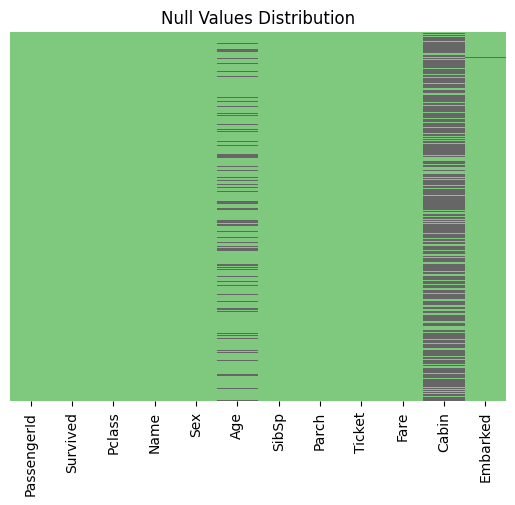

In [6]:
#In the previous step, some nulls were noticed. Let's see how they are distributed:
import seaborn as sns
sns.heatmap(df_unproc.isnull(), cbar = False, yticklabels=False, cmap = 'Accent');
plt.title('Null Values Distribution')


## Data Pre-Processing
- Consider which columns will be required to answer our questions.
- Check duplicates.
- Repair missing values.
- New columns if required.

In [3]:
#To drop out thos columns we won't work with.
#This step, allows to exclude the column containing the most null values.
df_prepro = df_unproc.drop(['SibSp', 'Parch','Ticket','Cabin'], axis='columns')
df_prepro.shape

(891, 8)

In [8]:
#Let's see how it looks:
df_prepro.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C


In [9]:
#Let's check the duplicates
df_prepro.duplicated().value_counts()

#No, it seems there are no duplicates.

False    891
Name: count, dtype: int64

In [10]:
#How many values are left to be repaired?
df_prepro.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
Embarked         2
dtype: int64

In [4]:
#Let's repair "Embarked": 2 missing values will be filled out through the "mode".

df_prepro['Embarked'].fillna(df_prepro['Embarked'].mode()[0], inplace=True)

#Same process for "Age", through the mean.
df_prepro['Age'].fillna(df_prepro['Age'].mean(), inplace=True)

In [12]:
# Checking previous step's correct execution. 
df_prepro.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

In [5]:
#Dividing column "Age" into Group_Ages, will allow a quick overview about the age representation onboard.
#Considering the tender age when actual kids were introduced to work, and the shorter longevity at the time, the 5 chosen age categories reflect a slightly different reality than nowadays':
#  0-6: kids
#  6-12: teens
#  13-20: young adults
#  21-50: adults
#  >50:   grown up adults

#Stablish categories:
def age_category(age):
    
    if age <= 6:
        return "Kid"
    elif 6 < age <= 12:
        return "Teen"
    elif  12 < age <= 20:
        return "Young Adult"
    elif  20 < age <= 50:
        return "Adult"
    elif age >50:
        return "Grown up Adult"
    
#Transform "Age" column to int. (step performed to deal with emergent errors)
df_prepro['Age']=df_prepro['Age'].astype({'Age':'int64'})

#Apply "age_category" to target column:
df_prepro['Age_Group'] = df_prepro['Age'].apply(age_category)

In [6]:
#A new column, Fare_Group, will be created. Grouping different fare prices will help understanding the price distribution.

#  0-7
#  8-20
#  20-50
#  50-100
#  101-200
#  200-300
#  300-400
#  400-500
#  >500

def fare_category(fare):
    
    if fare <= 7:
        return "<=7"
    elif 7 < fare <= 20:
        return "[7-20]"
    elif  20 < fare <= 50:
        return "[20-50]"
    elif  50 < fare <= 100:
        return "[50-100]"
    elif  100 < fare <= 200:
        return "[100-200]"
    elif  200 < fare <= 300:
        return "[200-300]"
    elif  300 < fare <= 400:
        return "[300-400]"
    elif  400 < fare <= 500:
        return "[400-500]"
    elif fare >500:
        return ">500"
    
#let's apply the Age_category function to the desired column
df_prepro['Fare_Group'] = df_prepro['Fare'].apply(fare_category)


In [15]:
#Quick check for the new column
df_prepro.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_Group,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,7.2500,S,Adult,[7-20]
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,71.2833,C,Adult,[50-100]
2,3,1,3,"Heikkinen, Miss. Laina",female,26,7.9250,S,Adult,[7-20]


## Data Visualization

In [16]:
#How many passengers includes this sample?
total_passengers = df_prepro['PassengerId'].count()
total_passengers 

#How many suvived?
df_survivors = df_prepro[df_prepro['Survived']>0] #data set of survivors
df_survivors.count()

df_died =df_prepro[df_prepro['Survived'] == 0] #data set of dead passengers

#Percentage of dead/survived: 
survivor_per = 342/total_passengers*100   # 342 people survived
died_per = 100-survivor_per

#Pie plot with %
# Define data
values = [survivor_per, died_per]
names = ['Yes', 'No']

# Define a color mapping
color_map = {'Yes': 'green', 'No': 'orange'}

# Create a DataFrame
data = {'Values': values, 'Names': names}
df = pd.DataFrame(data)

# Bar chart
fig = px.bar(df, x='Names', y='Values', color='Names',template="plotly_dark")
fig.update_traces(marker=dict(line=dict(color='black', width=2)))

# Set titles and labels
fig.update_layout(
    title="Titanic Survival Rate",
    xaxis_title="Survival Status",
    yaxis_title="Percentage",
    width=250,
    legend_title_text=None 
)

# Show the bar chart
fig.show()

In [17]:
#There was any known character in our dataset?
#For example:
###    John Jacob Astor IV:    Richest man onboard
###    Thomas Anderson:        Titanic's Architect
###    Edward John Smith:      Captain Ship

!pip3 install fuzzywuzzy
from fuzzywuzzy import process, fuzz #Librería de python. Herramienta para realizar comparaciones de coincidencias o similitud de cadenas.
umbral_similitud = 80
famous_names = ["John Jacob Astor IV", "Thomas Anderson", "Edward John Smith"]

#"Iterar" over data in order to find similar names to the reference ones.
for nombre_referencia in famous_names:
    # extractOne to get the best coincidence
    mejor_coincidencia = process.extractOne(nombre_referencia, df_prepro['Name'], scorer=fuzz.token_set_ratio)
    
    # Compare similarity to show the best coincidencce if its over the limit.
    if mejor_coincidencia[1] >= umbral_similitud:
        print(f"Coincidencia encontrada para '{nombre_referencia}': {mejor_coincidencia[0]}")



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip3 install --upgrade pip
Coincidencia encontrada para 'John Jacob Astor IV': Astor, Mrs. John Jacob (Madeleine Talmadge Force)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



#### MALE & FEMALE SURVIVAL

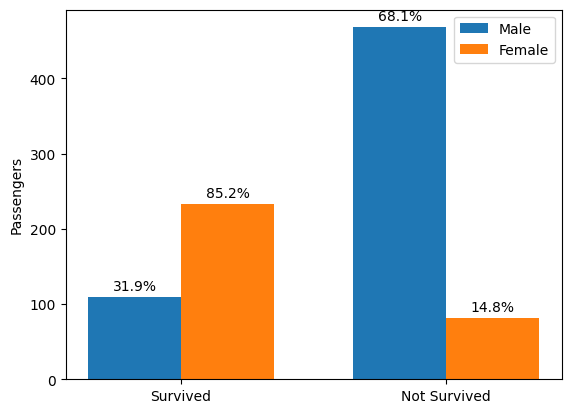

In [18]:
#Is there any difference among male and female survival? Let's look into it:

#percentages of male and females survived
man_surv = df_survivors[df_survivors['Sex']=="male"]
fem_surv= df_survivors[df_survivors['Sex']=="female"]
man_died = df_died[df_died['Sex']=="male"]
fem_died= df_died[df_died['Sex']=="female"]

#Obtain total values
man_surv.count()  #-->109
fem_surv.count()  #-->233
man_died.count()  #-->468
fem_died.count()  #--> 81

#Percentage values per each category
man_surv_per = round(109/342*100,1)
fem_surv_per = round(233/342*100,1)
man_died_per = round(468/549*100,1)
fem_died_per = round(81/549*100,1)


#--------------------------------------------------------------------------------------
##             HISTOGRAM
#--------------------------------------------------------------------------------------

# Get separately alive and dead passengers 
survived = df_survivors 
no_survived = df_died

# Count number of passengers (survived and not survived) per gender
survived_gender = survived['Sex'].value_counts()
no_survived_gender = no_survived['Sex'].value_counts()

# Create figure
fig1, ax = plt.subplots(1,1)

# Define data 
categorias = ['Survived', 'Not Survived']
male_values = [survived_gender.get('male', 0), no_survived_gender.get('male', 0)]
female_values = [survived_gender.get('female', 0), no_survived_gender.get('female', 0)]

# Width of bars
ancho = 0.35
x = range(len(categorias))

# Build histograma bars
bar1 = ax.bar(x, [male_values[0], male_values[1]], ancho, label='Male')
bar2 = ax.bar([i + ancho for i in x], [female_values[0], female_values[1]], ancho, label='Female')

# Label axis X 
ax.set_xticks([i + ancho/2 for i in x])
ax.set_xticklabels(categorias)

# Label axis Y
ax.set_ylabel('Passengers')

# Add legend
ax.legend()

# Add bar labels
etiquetas = [f'{man_surv_per}%',f'{fem_surv_per}%',f'{man_died_per}%',f'{fem_died_per}%']


def label_bars(rects,etiquetas):
    for rect, etiquetas in zip(rects, etiquetas):
        height = rect.get_height()
        ax.annotate(f'{etiquetas}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Distancia de la etiqueta desde la parte superior de la barra
                    textcoords="offset points",
                    ha='center', va='bottom')

label_bars(bar1, etiquetas[:2])
label_bars(bar2, etiquetas[2:])

# Mostrar el histograma
plt.show()


#### AGE GROUPS

In [19]:
#Let's take a look into the agr group distribution

import plotly.graph_objects as go
# Calculate frequency of each category
Age_Group_freq = df_prepro['Age_Group'].value_counts()
order = ['Grown up Adult', 'Adult', 'Young Adult', 'Teen', 'Kid', ]
Age_Group_freq = Age_Group_freq.loc[order]

# Create a Plotly bar chart
fig = go.Figure()
fig.add_trace(go.Bar(y=Age_Group_freq.index, x=Age_Group_freq.values,orientation='h'))

# Set layout and style
fig.update_layout(
    template="plotly_dark",
    title='Distribución de Grupos de Edad',
    xaxis_title='Frecuencia',
    yaxis_title='Grupo de Edad',
)

# Show 
fig.show()



In [20]:
#Obtener valores de grupos de edad for each category: male and female, survived and dead.

#Age Groups among man survived:
man_surv_age = man_surv['Age_Group'].value_counts()
ms_kids = man_surv_age.get('Kid')
ms_teens = man_surv_age.get('Teen')
ms_adults = man_surv_age.get('Adult')
ms_youngadults = man_surv_age.get('Young Adult')
ms_GUadults = man_surv_age.get('Grown up Adult')

#Age Groups among females survived:
fem_surv_age = fem_surv['Age_Group'].value_counts()
fs_kids = fem_surv_age.get('Kid')
fs_teens = fem_surv_age.get('Teen')
fs_adults = fem_surv_age.get('Adult')
fs_youngadults = fem_surv_age.get('Young Adult')
fs_GUadults = fem_surv_age.get('Grown up Adult')

#Age Groups among dead man:
man_died_age = man_died['Age_Group'].value_counts()
md_kids = man_died_age.get('Kid')
md_teens = man_died_age.get('Teen')
md_adults = man_died_age.get('Adult')
md_youngadults = man_died_age.get('Young Adult')
md_GUadults = man_died_age.get('Grown up Adult')

#Age Groups among dead females:
fem_died_age = fem_died['Age_Group'].value_counts()
fd_kids = fem_died_age.get('Kid')
fd_teens = fem_died_age.get('Teen')
fd_adults = fem_died_age.get('Adult')
fd_youngadults = fem_died_age.get('Young Adult')
fd_GUadults = fem_died_age.get('Grown up Adult')

#Cake plot for each Category:

import plotly.subplots as sp
import plotly.graph_objects as go

# Define colors for each pie chart
colors = [
    ['#0000FF', '#33FF57', '#6082B6', '#008080'],
    ['#0000FF', '#33FF57', '#6082B6', '#008080'],
    ['#0000FF', '#33FF57', '#6082B6', '#008080'],
    ['#0000FF', '#33FF57', '#6082B6', '#008080']
]

# Create a 2x2 subplot grid with 'pie' subplots
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=['Kids Onboard', 'Teens', 'Young Adults', 'Adults'], specs=[[{'type': 'pie'}, {'type': 'pie'}], [{'type': 'pie'}, {'type': 'pie'}]])

# Data for the pie charts
values = [
    [ms_kids, fs_kids, md_kids, fd_kids],
    [ms_teens, fs_teens, md_teens, fd_teens],
    [ms_youngadults, fs_youngadults, md_youngadults, fd_youngadults],
    [ms_adults, fs_GUadults, md_GUadults, fd_GUadults]
]

labels = ['M_survived', 'W_Survived', 'M_Died', 'W_Died']

# Loop to add each pie chart to a quadrant
for i in range(4):
    row = 1 if i < 2 else 2
    col = i % 2 + 1

    fig_pie = go.Pie(labels=labels, values=values[i])
   
    fig.add_trace(fig_pie, row=row, col=col)

# Set colors for each pie chart
    fig_pie.marker.colors = colors[i]

    fig.add_trace(fig_pie, row=row, col=col)

# Set the layout and style
fig.update_layout(
    template="plotly_dark",
    title_text="Distribution by Age Group",
)

# Show the subplot figure
fig.show()

#### EMBARKING

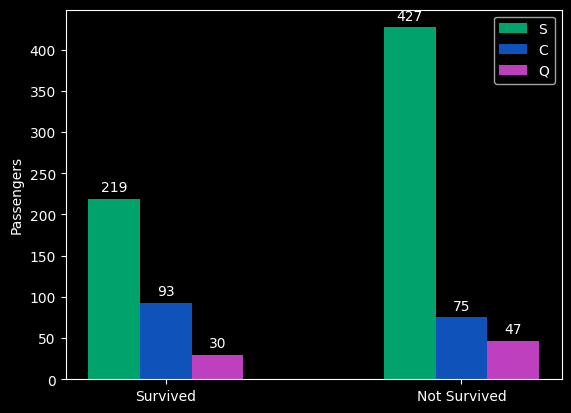

In [21]:
# Contar el número de pasajeros sobrevivientes y no sobrevivientes por puerta
no_survived_door = df_died['Embarked'].value_counts()
survived_door = df_survivors['Embarked'].value_counts()

#Set dark backgorund
from matplotlib import style
style.use('dark_background')


# Crear una figura para el histograma
fig4, ax = plt.subplots()

# Configurar los datos para el histograma
categorias = ['Survived', 'Not Survived']
s = [survived_door.get('S', 0), no_survived_door.get('S', 0)]
c = [survived_door.get('C', 0), no_survived_door.get('C', 0)]
q = [survived_door.get('Q', 0), no_survived_door.get('Q', 0)]

# Configurar la anchura de las barras
ancho = 0.35
x = 2*np.arange((len(categorias)))

# Define una paleta de colores personalizada
colors = ['#00A36C', '#0F52BA', '#BF40BF'] 

# Crear las barras del histograma
bar1 = ax.bar(x - ancho, s, ancho, label='S', color=colors[0])
bar2 = ax.bar(x, c, ancho, label='C', color=colors[1])
bar3 = ax.bar(x + ancho, q, ancho, label='Q', color=colors[2])

# Etiquetar el eje x y establecer las etiquetas
ax.set_xticks(x)
ax.set_xticklabels(categorias)

# Etiquetar el eje y
ax.set_ylabel('Passengers')

# Agregar una leyenda
ax.legend()

def etiquetar_barras(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Distancia de la etiqueta desde la parte superior de la barra
                    textcoords="offset points",
                    ha='center', va='bottom')

etiquetar_barras(bar1)
etiquetar_barras(bar2)
etiquetar_barras(bar3)

# Mostrar el histograma
plt.show()

#### Tickets Fare

In [22]:
#pasamos la columna Fare a entero
df_prepro['Fare']=df_prepro['Fare'].astype({'Fare':'int64'})

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, 'Fare Distribution')

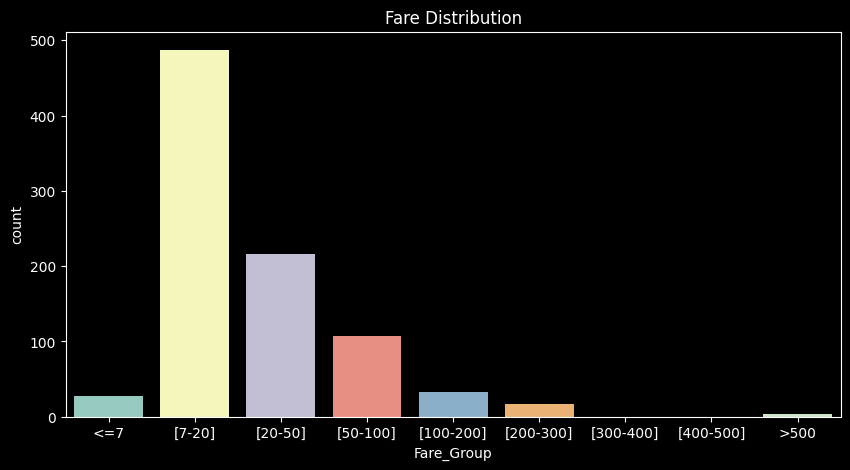

In [23]:
#Quiero que la scategorías aparezcan en el siguiente orden:
order = ["<=7", "[7-20]", "[20-50]", "[50-100]", "[100-200]", "[200-300]", "[300-400]", "[400-500]", ">500"]
#To modify the space separation between bars
space = 0.5

#To modify graphic shape
plt.figure(figsize=(10, 5))

#Countplot where the parameter 'order' is used to specify the desired X index.
sns.countplot(x='Fare_Group',data=df_prepro, order = order, dodge=space);
plt.title('Fare Distribution')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



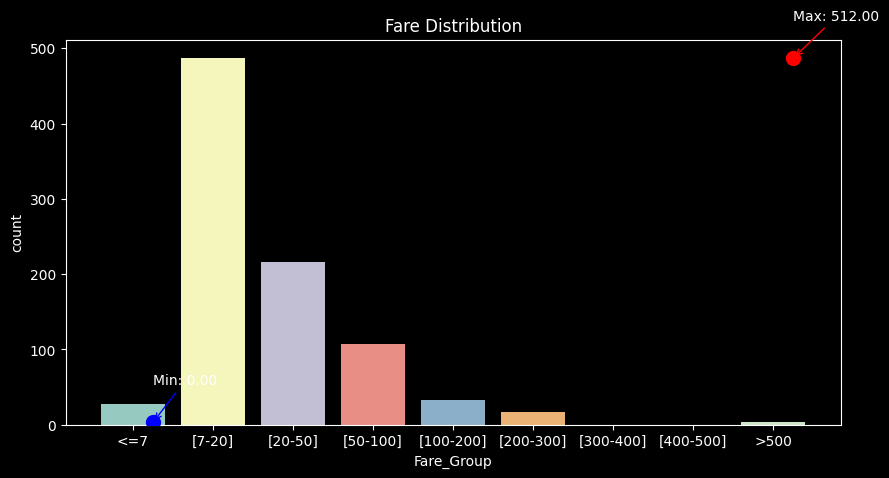

In [24]:
#Le añadimos el máximo y el mínimo

#pasamos la columna Fare a entero
df_prepro['Fare']=df_prepro['Fare'].astype({'Fare':'int64'})
#How much was the most expensive ticket?
max_price= df_prepro['Fare'].max()
max_price
#How much was the cheapest ticket?
min_price = df_prepro['Fare'].min()
min_price

import seaborn as sns
import matplotlib.pyplot as plt

# Define el orden y dodge como en el gráfico anterior
order = ["<=7", "[7-20]", "[20-50]", "[50-100]", "[100-200]", "[200-300]", "[300-400]", "[400-500]", ">500"]
space = 0.5

plt.figure(figsize=(10, 5))
sns.countplot(x='Fare_Group', data=df_prepro, order=order, dodge=space)
plt.title('Fare Distribution')

# Encuentra los índices de valor máximo y mínimo
max_price 
min_price 

# Ajusta las coordenadas x para alinear con las columnas
x_max = order.index(">500") + space / 2
x_min = order.index("<=7") + space / 2


# Agrega el punto máximo
plt.scatter(x_max, df_prepro['Fare_Group'].value_counts().max(), c='red', s=100, zorder=5)
plt.annotate(f'Max: {max_price:.2f}', xy=(x_max, df_prepro['Fare_Group'].value_counts().max()),
             xytext=(x_max, df_prepro['Fare_Group'].value_counts().max() + 50),
             arrowprops=dict(arrowstyle='->', color='red'))

# Agrega el punto mínimo
plt.scatter(x_min, df_prepro['Fare_Group'].value_counts().min(), c='blue', s=100, zorder=5)
plt.annotate(f'Min: {min_price:.2f}', xy=(x_min, df_prepro['Fare_Group'].value_counts().min()),
             xytext=(x_min, df_prepro['Fare_Group'].value_counts().min() + 50),
             arrowprops=dict(arrowstyle='->', color='blue'))

plt.show()


In [25]:
#So it was "Free Entrance" for some! Let's see who the privilage were!

#How many passengers had free ticket?
entradas_gratis =(df_prepro['Fare']==0)
free_passengers = df_prepro[df_prepro['Fare']==0]

entradas_gratis.sum()

15

In [26]:
#And who were the privileged ones?
free_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_Group,Fare_Group
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,S,Adult,<=7
263,264,0,1,"Harrison, Mr. William",male,40,0,S,Adult,<=7
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,S,Adult,<=7
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29,0,S,Adult,<=7
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,S,Young Adult,<=7
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29,0,S,Adult,<=7
466,467,0,2,"Campbell, Mr. William",male,29,0,S,Adult,<=7
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29,0,S,Adult,<=7
597,598,0,3,"Johnson, Mr. Alfred",male,49,0,S,Adult,<=7
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29,0,S,Adult,<=7


#### CORRELATIONS THORUGH HEADMAPS


In [27]:
#New data frame, where all columns contain numerical variables
df_titanic = df_prepro

#In order to convert the columns, the pandas' method MAP will be used. 
# This method will map the values in the target column and "replace" them with the new ones indicated in the dictionary.
sex_num={'male':1, 'female':2}
df_titanic['Sex'] = df_titanic['Sex'].map(sex_num).astype(int)

age_group_num={'Kid':1, 'Teen':2, 'Young Adult':3, 'Adult':4, 'Grown up Adult':5}
df_titanic['Age_Group'] = df_titanic['Age_Group'].map(age_group_num).astype(int)

embarked_num={'S':1, 'C':2, 'Q':3}
df_titanic['Embarked'] = df_titanic['Embarked'].map(embarked_num).astype(int)

fare_group_num={'<=7':1, '[7-20]':2, '[20-50]':3,'[50-100]':4, '[100-200]':5, '[200-300]':6,'[300-400]':7,'[400-500]':8, '>500':9}
df_titanic['Fare_Group'] = df_titanic['Fare_Group'].map(fare_group_num).astype(int)

In [28]:
df_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_Group,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",1,22,7,1,4,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38,71,2,4,4


In [29]:
#Exclude unnecessary columns
df_titanic.drop(['PassengerId', 'Name','Age','Fare'], axis='columns',inplace=True)

<Axes: >

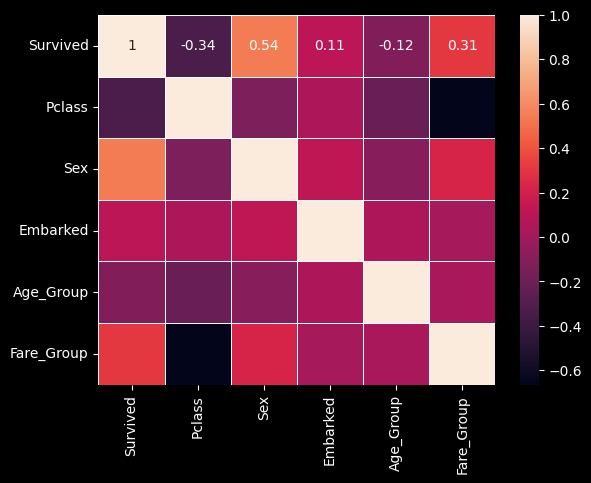

In [30]:
# Let's check the correlation between the variables 

sns.heatmap(df_titanic.corr(), annot=True, linewidths=.5) 

SIGNIFICANT RELATIONSHIP BETWEEN SEX AND SURVIVAL RATE?

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats


In [9]:
# H0:
# H1;

#Defining groups
grupo_A=df_prepro[df_prepro['Sex']=='male']['Survived']
grupo_B=df_prepro[df_prepro['Sex']=='female']['Survived']

In [13]:
#tests para comprobar normalidad

_, p_A= stats.shapiro(grupo_A)
_, p_B=stats.shapiro(grupo_B)

In [15]:
#probamos con otro test
_, p_A = stats.normaltest(grupo_A)
_, p_B = stats.normaltest(grupo_B)

print(p_A)
print(p_B)

5.156252695703762e-31
3.2817080095216318e-15


In [12]:
#muestra demasiado grande. vemos si las distribuciones son iguales o no con mannwhitneyo
import scipy.stats as stats
if p_A <0.05 or p_B <0.05:
    _,p_valor = stats.mannwhitneyu(grupo_A,grupo_B) 
    print(f'Tiene un p-valor de {p_valor}')
else:
    _,p_valor = stats.ttest_ind(grupo_A,grupo_B) #podem indicar que la variança és diferent: equal_var=False, si tenim prous dades
    print(f'Tiene un p-valor (por prueba t de dos muestras) de {p_valor}')

Tiene un p-valor de 4.315906231881016e-59


In [16]:
print(grupo_A.mean()) #male
print(grupo_B.mean()) #female

0.18890814558058924
0.7420382165605095


As visuals were indicating, survival of male and woman showed to be significantly different.
with 95% of confidence, it can be said that woman's survival was 74% higher than male's survival in the Titanic tragedy.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Fra

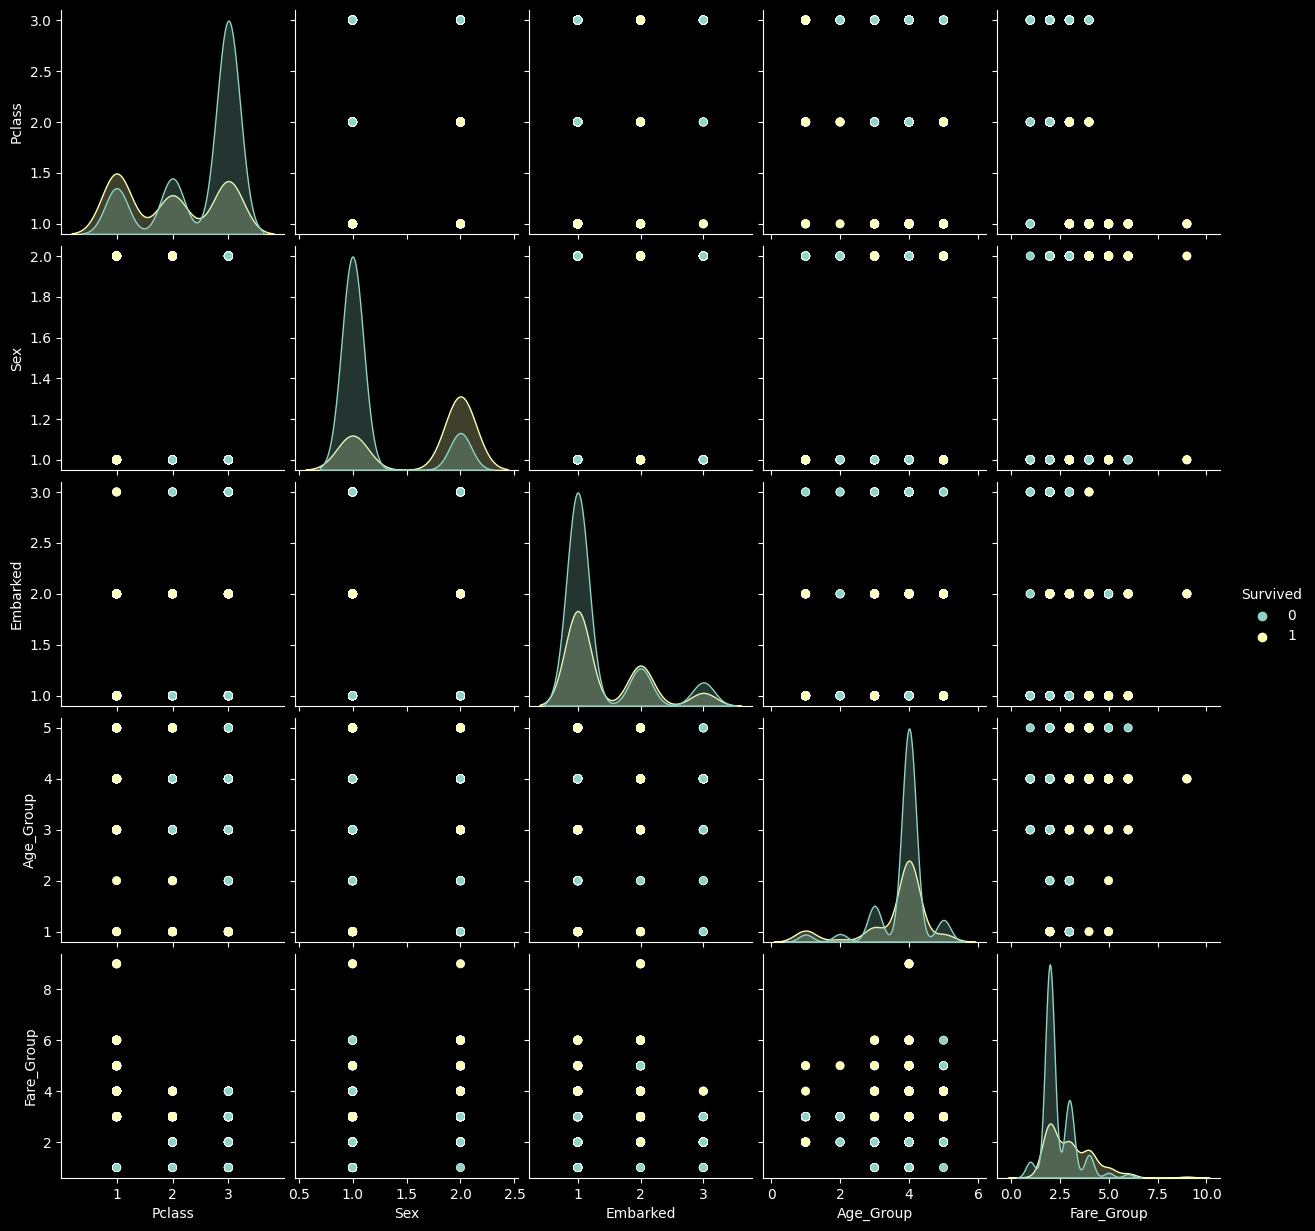

In [31]:
#Understanding the relationship between all the features

sns.pairplot(df_titanic, hue='Survived')

## CONCLUSIONS
- Hemos reconocido al hombre más rico a bordo del Titanic, en nuestro dataset!
- El 62% de personas a bordo, en nuestra muestra, murió
- De los cuales, el 70% eran hombres i el 15% mujeres
- La princiipal puerta de embarke fue la S
- y el billete costó entre 7 y 20 libras para la mayoría. 